In [1]:
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Parts needed for this measurement:

 * Solenoid or some other device to strike the cylinder with and make it vibrate at its natural frequency
 * Microphone to detect the sound 
 * Microcontroller to analyze the sound coming from the microphone
 * Some way of communicating the results (RED system's screen? Flashing light? website? SMS?)
 

<img src="./media/3Dimage.jpg" alt="3D" style="width: 300px;"/><img src="./media/IMG_5141.JPG" alt="Actual Installation" style="width: 300px;"/>


graphs with error bars

Measurement system analysis if possible

# All CO2 Cylinders in one graph

#### Frequency increases as the mass of CO2 in the cylinder decreases. 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


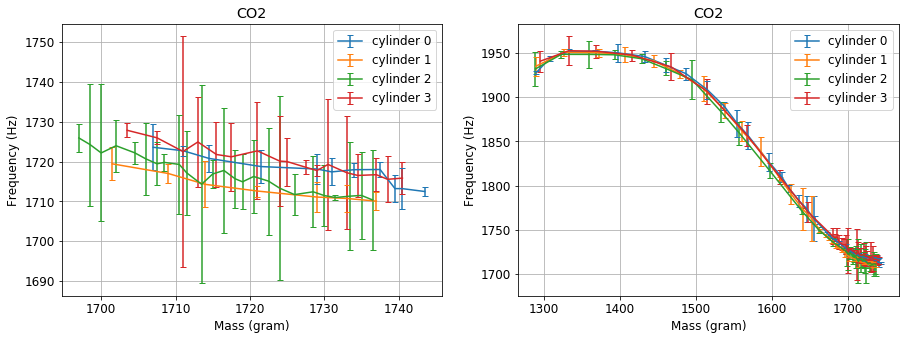

In [9]:
#
cylindersCO2 = [0, 0, 0, 0]

plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams.update({'font.size': 12})
for j in range(0,4):
    cylindersCO2[j] = pd.read_excel(r'Copy of Jazz CO2.xlsx',j)
    meanVal = []
    error = []
    weight = []
    switch = False
    for i in cylindersCO2[j]:
        meanVal.append(cylindersCO2[j][i].mean())
        maxm = cylindersCO2[j][i].max()
        minm = cylindersCO2[j][i].min()
        error.append(maxm-minm)
    for i in cylindersCO2[j]:
        weight.append(i)
        if i<weight[0]-40 and switch == False:
                pp = weight.index(i)
                switch = True
    plt.subplot(1,2,1)
    #plt.plot(weight[0:pp],meanVal[0:pp], '-x', label = "cylinder "+str(j))
    plt.errorbar(weight[0:pp],meanVal[0:pp],error[0:pp],capsize=3, label = "cylinder "+str(j))
    #plt.xlabel("Mass (gram)")
    #plt.ylabel("Frequency (Hz)")
    plt.subplot(1,2,2)
    #plt.plot(weight,meanVal, '-x', label = "cylinder "+str(j))
    plt.errorbar(weight,meanVal, error, capsize=3, label = "cylinder "+str(j))
    #plt.xlabel("Mass (gram)")
    #plt.ylabel("Frequency (Hz)")

plt.subplot(1,2,1)
plt.xlabel("Mass (gram)")
plt.ylabel("Frequency (Hz)")
plt.title("CO2")
plt.legend()
plt.grid()
plt.subplot(1,2,2)
plt.xlabel("Mass (gram)")
plt.ylabel("Frequency (Hz)")
plt.title("CO2")
plt.legend()
plt.grid()
plt.show()


#### Plot of frequency vs mass of CO2 for the first 15 grams of CO2. There is about 5Hz difference which can be detected.

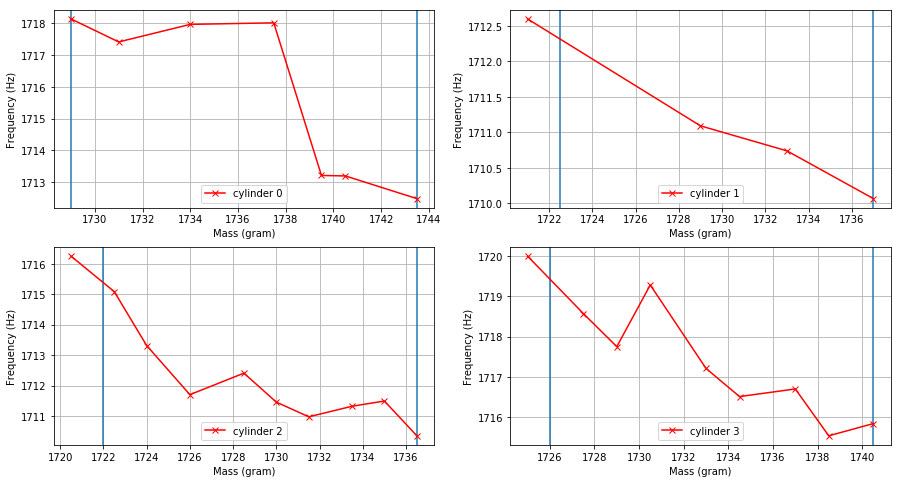

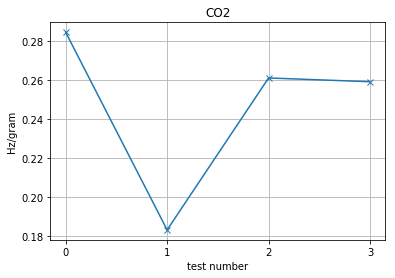

In [7]:
#
cylindersCO2 = [0, 0, 0, 0]
weightDif = [0, 0, 0, 0]
freqDif = [0, 0, 0, 0]
slope = [0, 0, 0, 0]
testNum = [0,1,2,3]

plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams.update({'font.size': 10})
for j in range(0,4):
    cylindersCO2[j] = pd.read_excel(r'Copy of Jazz CO2.xlsx',j)
    meanVal = []
    weight = []
    switch = False
    for i in cylindersCO2[j]:
        meanVal.append(cylindersCO2[j][i].mean())
    for i in cylindersCO2[j]:
        weight.append(i)
        if i<weight[0]-16 and switch == False:
                pp = weight.index(i)
                switch = True
    plt.subplot(2,2,j+1)
    plt.axvline(weight[0])
    plt.axvline(weight[0]-14.5)
    plt.plot(weight[0:pp],meanVal[0:pp], '-x', label = "cylinder "+str(j), color = "red")
    plt.xlabel("Mass (gram)")
    plt.ylabel("Frequency (Hz)")
    plt.legend()
    plt.grid()
    #plt.show()
    #print("weight difference = ", weight[0]-weight[pp])
    #print("Frequency difference = ", meanVal[pp]-meanVal[0])
    #print("Slope = ", (meanVal[pp]-meanVal[0])/(weight[0]-weight[pp]) )
    weightDif[j] = weight[0]-weight[pp]
    freqDif[j] = meanVal[pp]-meanVal[0]
    slope[j] = freqDif[j]/weightDif[j]
    
print("")
plt.show()
#print(meanVal)
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams.update({'font.size': 10})
plt.xlabel("test number")
plt.ylabel("Hz/gram")
plt.plot(testNum,slope,'-x')
plt.title("CO2")
plt.xticks(np.arange(min(testNum), max(testNum)+1, 1.0))
plt.grid()
plt.show()

The average sensitivity of the measurement device is about 0.2 Hz/gram for CO2 cylinders.

# Nitrogen Cylinders
#### Frequency decreases as the mass of N2 in the cylinder decreases.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


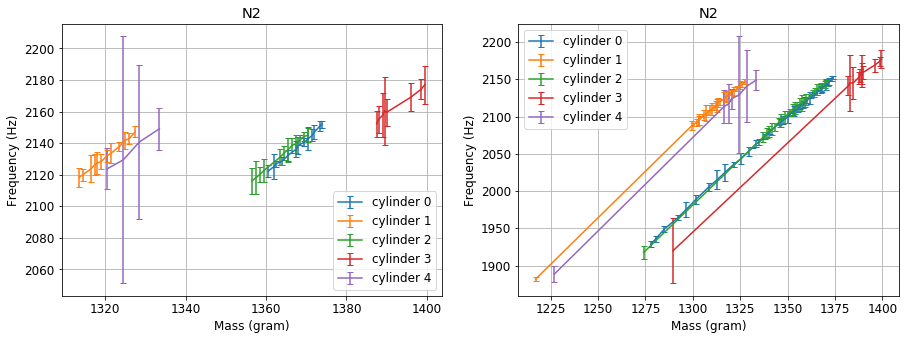

In [11]:
#
cylindersN2 = [0, 0, 0, 0, 0]

plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams.update({'font.size': 12})
for j in range(0,5):
    if j == 3:
        pass#continue
    cylindersN2[j] = pd.read_excel(r'ExperimentalResultsCleanedup.xlsx',j+1)
    meanVal = []
    weight = []
    error = []
    switch = False
    
    for i in cylindersN2[j]:         
        meanVal.append(cylindersN2[j][i].mean())
        maxm = cylindersN2[j][i].max()
        minm = cylindersN2[j][i].min()
        error.append(maxm-minm)
    for i in cylindersN2[j]:
        weight.append(i)
        if i<weight[0]-14 and switch == False:
            pp = weight.index(i)
            switch = True
    
    
    plt.subplot(1,2,1)
    #plt.plot(weight[0:pp],meanVal[0:pp], '-x', label = "cylinder "+str(j))
    plt.errorbar(weight[0:pp],meanVal[0:pp],error[0:pp],capsize=3, label = "cylinder "+str(j))
    #plt.xlabel("Mass (gram)")
    #plt.ylabel("Frequency (Hz)")
    plt.subplot(1,2,2)
    plt.errorbar(weight,meanVal,error,capsize=3, label = "cylinder "+str(j))
    #plt.plot(weight,meanVal, '-x', label = "cylinder "+str(j))
    #plt.xlabel("Mass (gram)")
    #plt.ylabel("Frequency (Hz)")

plt.subplot(1,2,1)
plt.xlabel("Mass (gram)")
plt.ylabel("Frequency (Hz)")
plt.legend()
plt.title("N2")
plt.grid()
plt.subplot(1,2,2)
plt.xlabel("Mass (gram)")
plt.ylabel("Frequency (Hz)")
plt.legend()
plt.title("N2")
plt.grid()
plt.show()

#### Plot of frequency vs mass of N2 for the first 15 grams of N2. There is about 30Hz difference which can be detected.

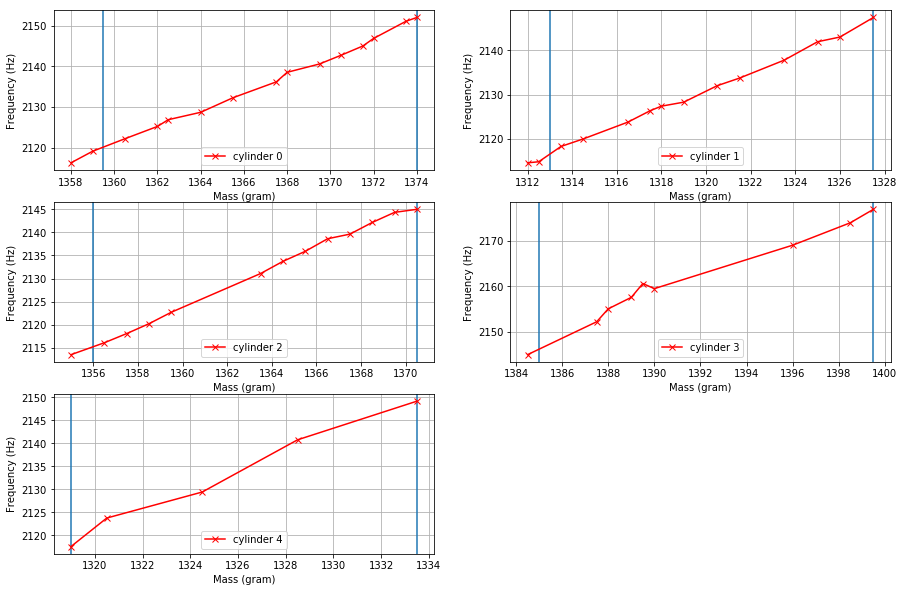

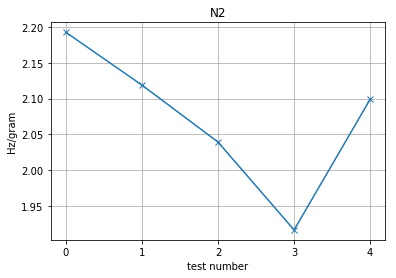

In [12]:
#
cylindersN2 = [0, 0, 0, 0, 0]
weightDif = [0, 0, 0, 0,0]
freqDif = [0, 0, 0, 0,0]
slope = [0, 0, 0, 0,0]
testNum = [0,1,2,3,4]

plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams.update({'font.size': 10})
for j in range(0,5):
    if j == 3:#it seems something went wrong with this test (outlier!)
        pass #continue
    cylindersN2[j] = pd.read_excel(r'ExperimentalResultsCleanedup.xlsx',j+1)
    meanVal = []
    weight = []
    switch = False
    
    for i in cylindersN2[j]:         
        meanVal.append(cylindersN2[j][i].mean())     
    for i in cylindersN2[j]:
        weight.append(i)
        if i<weight[0]-16 and switch == False:
            pp = weight.index(i)
            switch = True
    plt.subplot(3,2,j+1)
    plt.axvline(weight[0])
    plt.axvline(weight[0]-14.5)
    
    plt.plot(weight[0:pp],meanVal[0:pp], '-x', label = "cylinder "+str(j), color = "red")
    plt.xlabel("Mass (gram)")
    plt.ylabel("Frequency (Hz)")
    plt.legend()
    plt.grid()
    
    #print("weight difference = ", weight[0]-weight[pp])
    #print("Frequency difference = ", meanVal[0]-meanVal[pp])
    #print("Slope = ", (meanVal[0]-meanVal[pp])/(weight[0]-weight[pp]) )
    weightDif[j] = weight[0]-weight[pp]
    freqDif[j] = meanVal[0]-meanVal[pp]
    slope[j] = freqDif[j]/weightDif[j]
    
print("")
plt.show()
#print(meanVal)
#print(cylindersN2)
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams.update({'font.size': 10})
plt.xlabel("test number")
plt.ylabel("Hz/gram")
plt.plot(testNum,slope,'-x')
plt.xticks(np.arange(min(testNum), max(testNum)+1, 1.0))
plt.title("N2")
plt.grid()
plt.show()

The average sensitivity of the measurement device is 2 Hz/gram for Nitrogen.